<a href="https://colab.research.google.com/github/koularya/koularya/blob/main/7jan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df=pd.read_csv("/content/predict_energy_consumption.xls")
df.head()


,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [32]:
df.columns

Index(['temperature', 'humidity', 'wind_speed', 'solar_irradiance',
       'energy_consumption'],
      dtype='object')

In [33]:
x=df.drop('energy_consumption',axis=1)
y=df['energy_consumption']



In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)



In [35]:
x_train.shape

(800, 4)

In [36]:
#Define the network
model=Sequential([
    Dense(64,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
#compile
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [39]:
#fitting
history=model.fit(x_train_scaled,y_train,epochs=100,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 86796.5938 - mae: 265.3389 - val_loss: 83426.3047 - val_mae: 258.4859
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 95710.8125 - mae: 280.9802 - val_loss: 82723.3594 - val_mae: 257.1158
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 85675.4375 - mae: 263.0622 - val_loss: 81685.8516 - val_mae: 255.0797
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 84692.0156 - mae: 262.1040 - val_loss: 80126.7656 - val_mae: 251.9917
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 87120.8828 - mae: 265.0454 - val_loss: 77833.2266 - val_mae: 247.3763
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 86029.2734 - mae: 264.9812 - val_loss: 74608.3281 - val_mae: 240.7297
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79391.1875 - mae: 250.9824 - val_loss: 70294.7109 - val_mae: 231.5323
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74476.8594 - mae: 238.4476 - val_loss

In [40]:
test_loss,test_mae=model.evaluate(x_test,y_test,verbose=1)
print('Test Mean Absolute error',test_mae)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1357197568.0000 - mae: 33523.3867  
Test Mean Absolute error 33072.7578125


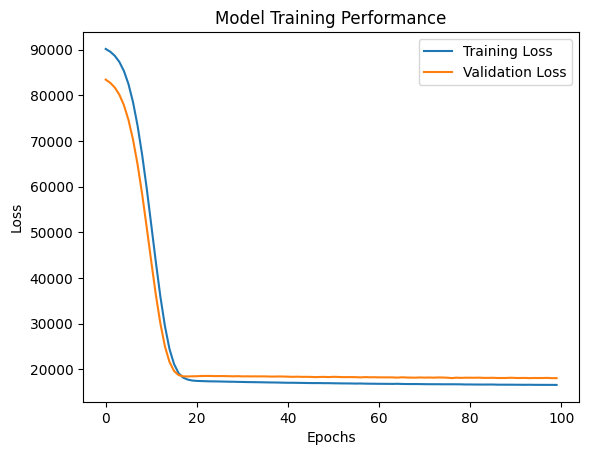

In [41]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [42]:
from tensorflow.keras.layers import Dropout

In [43]:
model=Sequential([
    Dense(128,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64,activation='relu'),
    Dense(34,activation='relu'),
    Dense(16,activation='relu'),
    Dropout(0.4),
    Dense(1)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 34)             │         2,210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 16)             │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,755 (432.64 KB)

 Trainable params: 110,755 (432.64 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [46]:
history=model.fit(x_train_scaled,y_train,epochs=100,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 93310.3594 - mae: 277.6433 - val_loss: 60501.9375 - val_mae: 209.4557
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 41927.4570 - mae: 164.4137 - val_loss: 26770.3750 - val_mae: 132.2255
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 31973.3105 - mae: 146.1981 - val_loss: 20047.9375 - val_mae: 118.2389
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 27453.0449 - mae: 135.7968 - val_loss: 19588.7773 - val_mae: 118.1291
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26673.9180 - mae: 135.0224 - val_loss: 20147.5039 - val_mae: 119.2150
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26436.7246 - mae: 134.7040 - val_loss: 19691.8633 - val_mae: 117.5544
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26501.2715 - mae: 133.8694 - val_loss: 19532.0996 - val_mae: 118.0215
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 25906.7383 - mae: 133.2982 - val_loss

In [47]:
test_loss,test_mae=model.evaluate(x_test,y_test,verbose=1)
print('Test Mean Absolute error',test_mae)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 439127264.0000 - mae: 18990.4961  
Test Mean Absolute error 18764.8828125


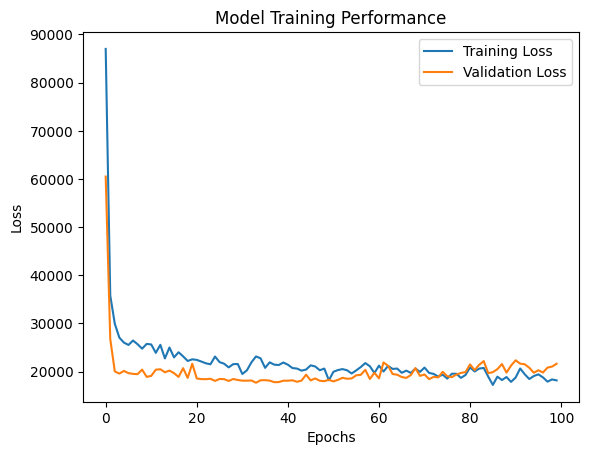

In [48]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()